In [1]:
# Date: 03/August/2018
# @Author: Mohammad Noor Ul Hasan
# Title: SMS Spam Prediction
# Language used: Python 3.5
# Data Structure used: Python List & Dataframe
# Modules Used:  NLTK, NumPy, Pandas, Scikit-learn, Matplotlib & Seaborn
# Output Description: CSV File of Predicted Results 
# Last Edit: 06/August/2018 

import numpy as np
import pandas as pd
import csv
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

path = "../Problem/"                # Eg. "C:/Users/DELL/Downloads/"

In [2]:
#        TASK - 1 :  Read CSV File ( ORIGINAL FILE )

train_data = pd.read_csv(open(path+'Training.csv'))
test_data = pd.read_csv(open(path + 'Testing.csv'))

In [3]:
train_data.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
test_data[9:13]

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
9,ham,Ok...,NaN,NaN,NaN
10,ham,"Hey, a guy I know is breathing down my neck to...",NaN,NaN,NaN
11,ham,"\Response\"" is one of d powerful weapon 2 occu...","always give response 2 who cares 4 U\""... Gud...",NaN,NaN
12,ham,Nokia phone is lovly..,NaN,NaN,NaN


In [5]:
#        TASK - 2 :  CLEANING & LABEL ENCODING 

# Cleaning csv file, merging the splited columns message (Eg. Testing Set Row 11)

# Convert the testing data into list
test_data = csv.reader(open(path+'Testing.csv'))
lines = list(test_data)

newCSV = []
for row in lines:
    #new  temporary list to store a row containing only class and message   
    tempList= []
    #appending class which is the first element into temporary list
    tempList.append(row[0])
    #combining the coulmns which contains the splited message 
    i=1
    temp=row[1]
    while(i<len(row)-1):
        i+=1
        temp+=row[i]
    #set of class & message    
    tempList.append(temp)
    #making a new list with only class and single columned message
    newCSV.append(tempList)

    
# Creating cleaned  CSV Testing File
with open(path+"_Testing.csv", "w") as tempList:
    writer = csv.writer(tempList)
    writer.writerows(newCSV)
    
# open cleaned test file
test_data  = pd.read_csv(path+"_Testing.csv")

# drop none columns
test_data = test_data.dropna(axis=1)
train_data = train_data.dropna(axis=1)

# Label Encoding, converting class into numerics, spam = 1 & ham = 0
test_data['class'] = test_data['class'].apply(lambda x : 0 if x == 'ham' else 1)
train_data['class'] = train_data['class'].apply(lambda x : 0 if x == 'ham' else 1)

#Conclusion :  train_data &  test_data CONTAINS THE REQUIRED DATAFRAME--------------------------------------------

In [6]:
train_data.head(5)

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
test_data[13:18]

,class,message
13,1,**FREE MESSAGE**Thanks for using the Auction S...
14,1,Bored housewives! Chat n date now! 0871750.77....
15,0,Sorry da..today i wont come to play..i have dr...
16,0,I'm really sorry I lit your hair on fire
17,0,"Oh! Shit, I thought that was your trip! Looooo..."


In [10]:
#        TASK- 3 :  TOKENIZING & CREATING POSITION TAGS


# tokenize,  train_data using NLTK 
train_data['tokens'] = train_data['message'].apply(lambda x : nltk.word_tokenize(x))
train_data['position_tags'] = train_data['tokens'].apply(lambda x:[temp for z, temp in nltk.pos_tag(x)])
train_data['tags_sentence'] = train_data['position_tags'].apply(lambda x: ' '.join(x))

test_data['tokens'] = test_data['message'].apply(lambda x : nltk.word_tokenize(x))
test_data['position_tags'] = test_data['tokens'].apply(lambda x : [temp for z, temp  in nltk.pos_tag(x)])
test_data['tags_sentence'] = test_data['position_tags'].apply(lambda x : ' '.join(x))

In [11]:
train_data.head()

,class,message,tokens,position_tags,tags_sentence
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy.., Availab...","[NNP, IN, JJ, NN, ,, NN, NNP, RB, IN, NN, RB, ...","NNP IN JJ NN , NN NNP RB IN NN RB JJ NN NN FW ..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[NNP, NN, :, NNP, WRB, JJ, NN, :]",NNP NN : NNP WRB JJ NN :
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[JJ, NN, IN, CD, DT, JJ, NN, TO, VB, NNP, NNP,...",JJ NN IN CD DT JJ NN TO VB NNP NNP JJ NN CD NN...
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[JJ, NNS, VBP, RB, JJ, NN, :, NNP, VBP, RB, RB...",JJ NNS VBP RB JJ NN : NNP VBP RB RB VBP :
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[NNP, PRP, VBP, RB, VB, PRP, VBZ, TO, VB, ,, P...","NNP PRP VBP RB VB PRP VBZ TO VB , PRP VBZ RB R..."


In [12]:
test_data.head()

,class,message,tokens,position_tags,tags_sentence
0,0,either way works for me. I am &lt;#&gt; year...,"[either, way, works, for, me, ., I, am, &, lt,...","[DT, NN, VBZ, IN, PRP, ., PRP, VBP, CC, VBP, :...",DT NN VBZ IN PRP . PRP VBP CC VBP : # CC NN : ...
1,0,Maybe you should find something else to do ins...,"[Maybe, you, should, find, something, else, to...","[RB, PRP, MD, VB, NN, RB, TO, VB, RB, ., ., .]",RB PRP MD VB NN RB TO VB RB . . .
2,0,Gain the rights of a wife.dont demand it.i am ...,"[Gain, the, rights, of, a, wife.dont, demand, ...","[VB, DT, NNS, IN, DT, JJ, NN, NN, VBP, VBG, IN...",VB DT NNS IN DT JJ NN NN VBP VBG IN NN NNS VBP
3,0,I liked your new house,"[I, liked, your, new, house]","[PRP, VBD, PRP$, JJ, NN]",PRP VBD PRP$ JJ NN
4,0,I'm fine. Hope you are also,"[I, 'm, fine, ., Hope, you, are, also]","[PRP, VBP, JJ, ., NN, PRP, VBP, RB]",PRP VBP JJ . NN PRP VBP RB


In [13]:
#        TASK- 4 :  DEFINING PARAMETERS

x_train = train_data['message'] 
x_test = test_data['message']
y_train = train_data['class']
y_test = test_data['class']

In [14]:
#        TASK- 5 :  SELECT 'RFC' TO MAKE PREDICTIONS ON TESTING DATASET 

#using Random Forest Calassifier
classifier = RandomForestClassifier()

# Converting raw document to a matrix of TF-IDF features
vectorizer =TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
#max_df => When building the vocabulary ignore terms that have a frequency strictly higher than given threshold
#stop_words =>Terms that were ignored bcz they either:
#occurred in too many (max_df) or too few documents (min_df) or were cut off by feature selection (max_features)


X_train= vectorizer.fit_transform(x_train)

classifier.fit( X_train.todense(), y_train)

# Making predictions on Testing File
outputList = []
for index, row in test_data.iterrows():
    label = row[0]
    message = row[1]
    X_train = vectorizer.transform([message])
    predict = classifier.predict(X_train)[0]
    
    # If prediction is same as the actual label
    if predict == label:
        result = 'Correct'
    else:
        result = 'Wrong'
        
    # This list contains all details about prediction
    outputList.append([message, label, predict, result])


output = pd.DataFrame.from_records(outputList,columns=['Message', 'actualMessageType', 'predictedType', 'Result'])
# Converting data into it's original form
output['actualMessageType'] = output['actualMessageType'].apply(lambda x : 'ham' if x == 0 else 'spam')
output['predictedType'] = output['predictedType'].apply(lambda x : 'ham' if x == 0 else 'spam')

# Saving Prediction Results into a CSV File
output.to_csv("Prediction_Result.csv")
print("\t"*9,"--- * PREDICTED RESULTS * ---")
pd.read_csv("Prediction_Result.csv")

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


									 --- * PREDICTED RESULTS * ---


,Unnamed: 0,Message,actualMessageType,predictedType,Result
0,0,either way works for me. I am &lt;#&gt; year...,ham,ham,Correct
1,1,Maybe you should find something else to do ins...,ham,ham,Correct
2,2,Gain the rights of a wife.dont demand it.i am ...,ham,ham,Correct
3,3,I liked your new house,ham,ham,Correct
4,4,I'm fine. Hope you are also,ham,ham,Correct
5,5,"Also north carolina and texas atm, you would j...",ham,ham,Correct
6,6,Same to u...,ham,ham,Correct
7,7,yes baby! I need to stretch open your pussy!,ham,ham,Correct
8,8,Thanks and ! Or bomb and date as my phone wan...,ham,ham,Correct
9,9,Ok...,ham,ham,Correct


In [15]:
#        TASK- 6 :  MAKE PREDICTION REPORT TO TEST PREDICTION 

X_train= vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

clf = RandomForestClassifier()
clf.fit(X_train.todense(), y_train)
y_pred = clf.predict(X_test.todense())
target_names = ['ham', 'spam']

cr = classification_report(y_test, y_pred, target_names = target_names)
print("Classification Report : \n\n",cr)
print("-"*70)
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix : \n\n", confusion_mat)
print("\n","-"*70)
print("\nAccuracy Score : \n\n", accuracy_score(y_test, y_pred), "\n")


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Classification Report : 

              precision    recall  f1-score   support

        ham       0.98      1.00      0.99       483
       spam       1.00      0.86      0.93        74

avg / total       0.98      0.98      0.98       557

----------------------------------------------------------------------

Confusion Matrix : 

 [[483   0]
 [ 10  64]]

 ----------------------------------------------------------------------

Accuracy Score : 

 0.9820466786355476 



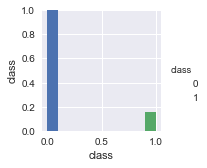

In [30]:

# PAIR PLOT
sns.pairplot(train_data, hue='class', size=2.5);
plt.show()




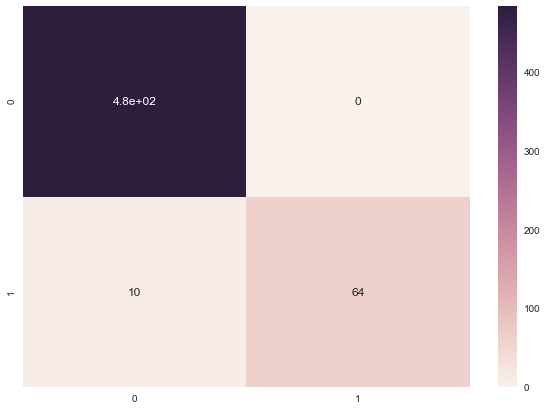

array([[483,   0],
       [ 10,  64]])

In [27]:
# CONFUSION MATRIX PLOT
plt.figure(figsize = (10,7))
sns.heatmap(confusion_mat, annot=True)
plt.show()
confusion_mat